In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('US_electoral_data.xlsx',index_col=0)
df.head()

,male_vote,female_vote,white_vote,black_vote,hispanic_vote,other_vote,voter_turnout,inflation_growth,aliens_since_last_election,recessions,urban_pop,unemp_rate,violent_crime,property_crime,prev_gov,election_winner
Year,,,,,,,,,,,,,,,,
1948,52,48,95,5,0,0,51.1,26.9,1500000,1,60,3.8,145,950,0,0
1952,52,48,94,6,0,0,61.6,16.5,1200000,1,63,3.0,160,1100,0,1
1956,51,49,93,7,0,0,59.3,5.1,1000000,1,64,4.1,161,1200,1,1
1960,51,49,92,8,0,0,62.8,6.0,1100000,1,69,5.5,161,1318,1,0
1964,50,50,91,9,0,0,61.4,5.3,1200000,0,70,5.2,190,1564,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 1948 to 2016
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   male_vote                   18 non-null     int64  
 1   female_vote                 18 non-null     int64  
 2   white_vote                  18 non-null     int64  
 3   black_vote                  18 non-null     int64  
 4   hispanic_vote               18 non-null     int64  
 5   other_vote                  18 non-null     int64  
 6   voter_turnout               18 non-null     float64
 7   inflation_growth            18 non-null     float64
 8   aliens_since_last_election  18 non-null     int64  
 9   recessions                  18 non-null     int64  
 10  urban_pop                   18 non-null     int64  
 11  unemp_rate                  18 non-null     float64
 12  violent_crime               18 non-null     int64  
 13  property_crime              18 non-nu

___________________


**Correlation Matrix**

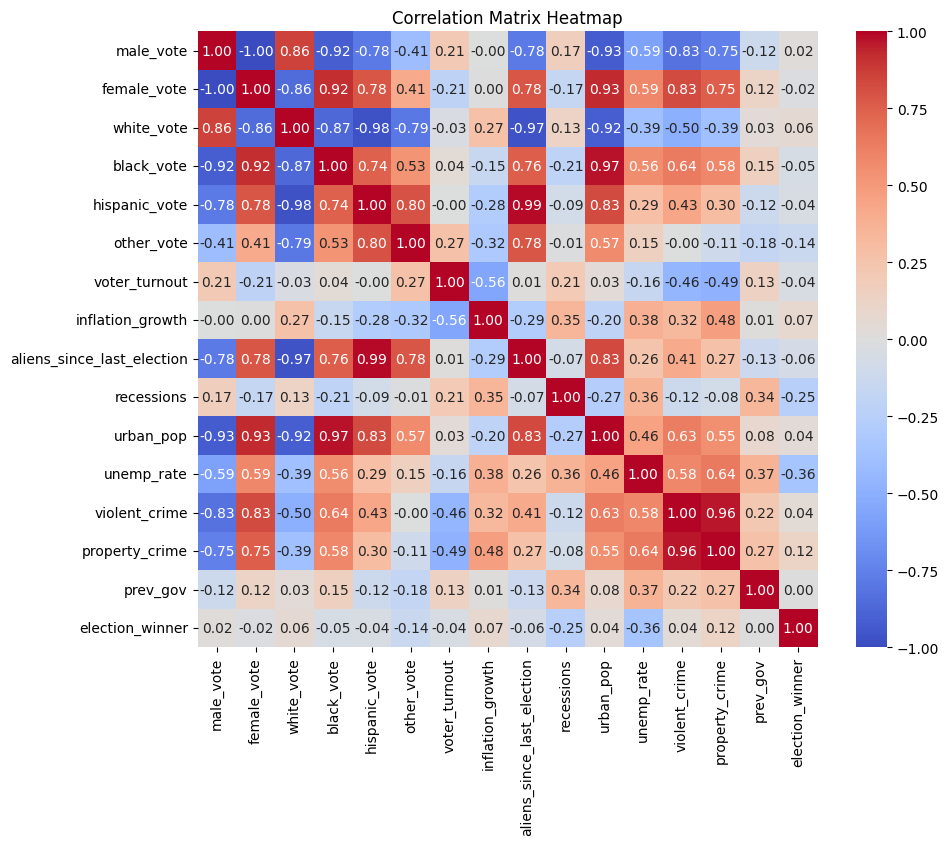

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

__________________

**Scaling the Data**

In [5]:
# SCALING THE DATA

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
scaled_data_minmax = minmax_scaler.fit_transform(df)
df_minmax_scaled = pd.DataFrame(scaled_data_minmax, columns=df.columns)


# Standard Scaling (Z-Score)
standard_scaler = StandardScaler()
scaled_data_standard = standard_scaler.fit_transform(df)
df_standard_scaled = pd.DataFrame(scaled_data_standard, columns=df.columns)
df_standard_scaled['election_winner'] = df_minmax_scaled['election_winner']


# Robust Scaling
robust_scaler = RobustScaler()
scaled_data_robust = robust_scaler.fit_transform(df)
df_robust_scaled = pd.DataFrame(scaled_data_robust, columns=df.columns)

_______________________
**Splitting & Training the Data**

**Leave-One-Out Cross-Validation (LOOCV)**:  special case of cross-validation where each sample is used as a test set once, and the remaining samples (17 rows) form the training set. Maximizes the use of limited data for training and ensures reliable evaluation.

In [6]:
# SPLITTING THE DATA
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

current_df = df_minmax_scaled

X = current_df.drop(columns=["election_winner"])  
y = current_df["election_winner"]                 
loo = LeaveOneOut()

In [7]:
current_df.shape

(18, 16)

In [8]:
# Logistic Regression
logistic_model = LogisticRegression()
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model.fit(X_train, y_train)
    y_true.append(y_test.iloc[0])
    y_pred.append(logistic_model.predict(X_test)[0])

print("Logistic Regression Accuracy:", accuracy_score(y_true, y_pred))

Logistic Regression Accuracy: 0.2777777777777778


In [ ]:
# Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    svm_model.fit(X_train, y_train)
    y_true.append(y_test.iloc[0])
    y_pred.append(svm_model.predict(X_test)[0])

print("SVM Accuracy:", accuracy_score(y_true, y_pred))

SVM Accuracy: 0.2222222222222222


In [ ]:
# K Neighbour Classifer
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)  # Use a small k value
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn_model.fit(X_train, y_train)
    y_true.append(y_test.iloc[0])
    y_pred.append(knn_model.predict(X_test)[0])

print("k-NN Accuracy:", accuracy_score(y_true, y_pred))

k-NN Accuracy: 0.2777777777777778


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3)  # Restrict depth
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    tree_model.fit(X_train, y_train)
    y_true.append(y_test.iloc[0])
    y_pred.append(tree_model.predict(X_test)[0])

print("Decision Tree Accuracy:", accuracy_score(y_true, y_pred))

Decision Tree Accuracy: 0.4444444444444444


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    nb_model.fit(X_train, y_train)
    y_true.append(y_test.iloc[0])
    y_pred.append(nb_model.predict(X_test)[0])

print("Naive Bayes Accuracy:", accuracy_score(y_true, y_pred))

Naive Bayes Accuracy: 0.2222222222222222


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)
y_true, y_pred = [], []

for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    y_true.append(y_test.iloc[0])
    y_pred.append(rf_model.predict(X_test)[0])

print("Random Forest Accuracy:", accuracy_score(y_true, y_pred))

Random Forest Accuracy: 0.3333333333333333
